In [ ]:
#Importações e definições iniciais

import pandas as pd #Importa pandas



calculos = ['CALCULO DIF E INTEGRAL I','CALCULO DIF E INTEGRAL II','CALCULO DIF E INTEGRAL III'] #Lista com os valores das matérias de cálculo
relacionadas = ['CALCULO NUMERICO','FUND DE MATEMATICA P/ C.DA COMPUTACAO I','FUND DE MATEMATICA P/ C.DA COMPUTACAO II', #Lista de disciplinas relacionadas a calculo
'INTRODUÇÃO À ÁLGEBRA','ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA','ÁLGEBRA LINEAR','INTRODUÇÃO À PROBABILIDADE','PROBABILIDADE E ESTATÍSTICA']
abreviacoes = ['C. Num','FMCC1','FMCC2','Intro. Algb','Algb. Vet','Algb. Lin','Intro. Prob','Prob. e Est.'] #Textos de abreviação das disciplinas relacionadas

urlDadosCadeiras = 'https://raw.githubusercontent.com/elasComputacao/raio-x-dados/main/data/dados-brutos/historico_alunos_raiox.csv'
dados = pd.read_csv(urlDadosCadeiras) #Importação dos dados

frame = pd.DataFrame(dados,columns=['nome_disciplina','situacao','media_final']) #Criacao de um DataFrame com as colunas de interesse
calculoFrame = frame[frame['nome_disciplina'].isin(calculos)] #Filtra o dataframe para que apenas as linhas em que 'nome_disciplina' esteja entre as disciplinas de calculo
relacionadasFrame = frame[frame['nome_disciplina'].isin(relacionadas)] #Filtra o dataframe para que sobre apenas as disciplinas relacionadas

<Axes: >

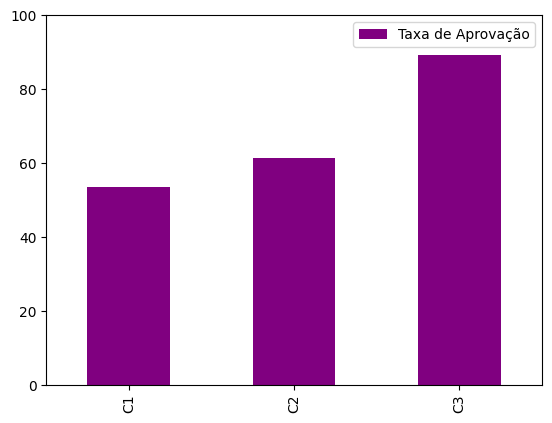

In [ ]:
#Aprovações e Reprovações nas disciplinas de cálculo

taxas_aprov = []
for i in range(len(calculos)):
  aprovados = calculoFrame[calculoFrame['nome_disciplina'] == calculos[i]]['situacao'].value_counts()['Aprovado']
  reprovados = calculoFrame[calculoFrame['nome_disciplina'] == calculos[i]]['situacao'].value_counts()['Reprovado']
  taxas_aprov.append((aprovados / (aprovados+reprovados) )*100)

pd.DataFrame({'Taxa de Aprovação' : taxas_aprov}, index = ['C1','C2','C3']).plot.bar(ylim=[0,100],color='purple')

<Axes: >

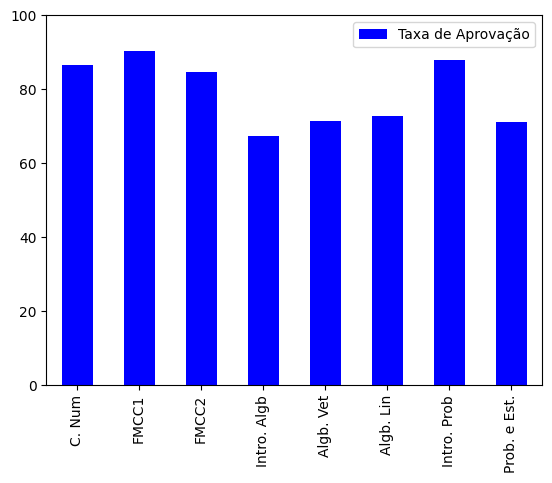

In [ ]:
#Aprovacoes e Reprovacoes das disciplinas relacionadas a calculo
taxas_aprov_relacionadas = []

for i in range(len(relacionadas)):
  aprovados = relacionadasFrame[relacionadasFrame['nome_disciplina'] == relacionadas[i]]['situacao'].value_counts()['Aprovado']
  reprovados = relacionadasFrame[relacionadasFrame['nome_disciplina'] == relacionadas[i]]['situacao'].value_counts()['Reprovado']
  taxas_aprov_relacionadas.append((aprovados / (aprovados+reprovados) )*100)

pd.DataFrame({'Taxa de Aprovação' : taxas_aprov_relacionadas}, index = abreviacoes).plot.bar(ylim=[0,100],color = "blue")


Representação das médias dos alunos em cada disciplina de Cálculo em boxplot:


<Axes: >

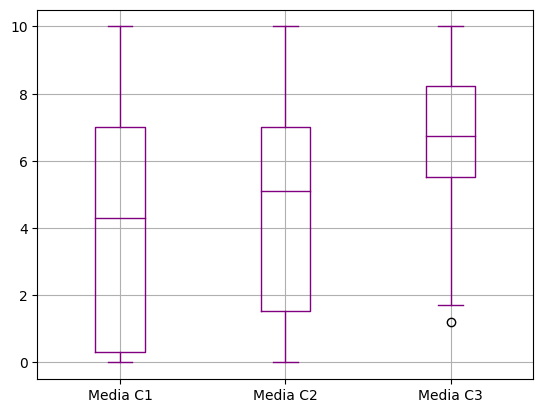

In [ ]:
#Distribuição das Médias nas matérias de cáculo
print("Representação das médias dos alunos em cada disciplina de Cálculo em boxplot:")
calculoMedias = [calculoFrame[calculoFrame['nome_disciplina'] == calculos[0]]['media_final'], #Divisão das médias finais de cada disciplina
                calculoFrame[calculoFrame['nome_disciplina'] == calculos[1]]['media_final'],
                calculoFrame[calculoFrame['nome_disciplina'] == calculos[2]]['media_final']]

frame = { #definição das colunas do novo dataframe
    'Media C1' : calculoMedias[0],
    'Media C2' : calculoMedias[1],
    'Media C3' : calculoMedias[2]
}
resultante = pd.DataFrame(frame) #Criação do novo dataframe com as colunas sendo a média de cada discp de calculo
resultante.boxplot(color='purple') #Contrução da visualização do dataframe em boxplot

<Axes: >

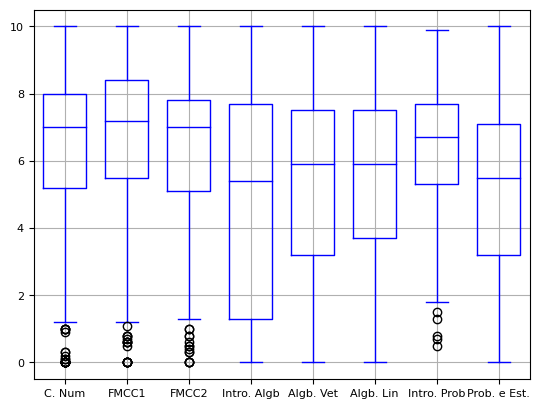

In [ ]:
#Distribuição das médias em outras matérias relacionadas a cálculo
relacionadasMedias = []
frame_relac = {}
for i in range(len(relacionadas)):
  relacionadasMedias.append(relacionadasFrame[relacionadasFrame['nome_disciplina'] == relacionadas[i]]['media_final']) #Adiciona as Series das medias de cada disciplina
  frame_relac[abreviacoes[i]] = relacionadasMedias[i] #Adiciona mais itens ao dicionario
resultante_relac = pd.DataFrame(frame_relac)
resultante_relac.boxplot(color='blue',widths=0.7, fontsize=8)

##Conclusões

  - No geral, há uma taxa geral de 59% de aprovação nas disciplinas de cálculo entre os alunos que realmente finalizam a cadeira.

  - O gráfico boxplot feito no colab indica que as médias finais dos alunos nessas disciplinas aumentam gradativamente conforme avançam para a próxima cadeira. Ao contrário do que se imaginaria, a média das médias finais de C3 é maior que a de C2, que por sua vez é maior que a de C1.

  - Isso parece indicar que os alunos, no geral, têm mais dificuldade em C1 do que em C2 em C3. Hipótese minha de que isso se daria ao fato de que é o primeiro contato que os alunos têm com uma disciplina de cálculo.

  - Entre as outras disciplinas relacionadas à Cálculo, Introdução à Algebra possui tanto a menor taxa de aprovação quanto a menor média de notas finais.

  - Em relação às disciplinas relacionadas à Cálculo, é possível perceber uma certa proporcionalidade entre as taxas de aprovação e as médias finais de cada matéria: as matérias que mais aprovam alunos têm uma média entre as médias finais proporcionalmente alta.